In [4]:
usedcars <- read.csv ("usedcars.csv", stringsAsFactors = FALSE)

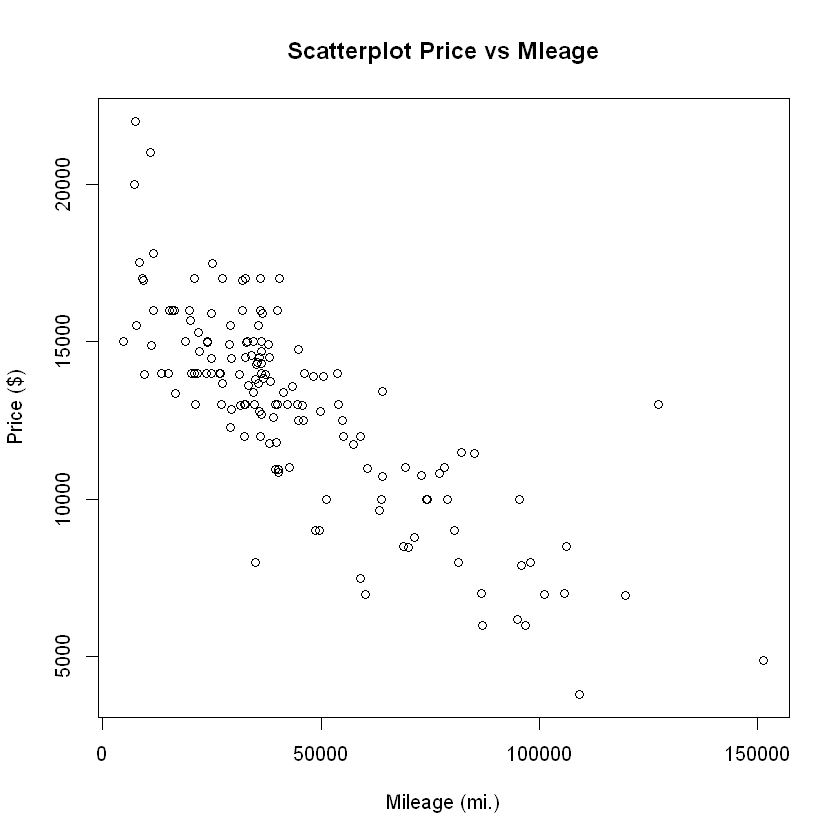

In [5]:
plot (x=usedcars$mileage, y=usedcars$price, main="Scatterplot Price vs Mleage", xlab="Mileage (mi.)", ylab="Price ($)") 

In [6]:
attach(usedcars)

In [7]:
lm1 <- lm (price ~ mileage) 
summary (lm1)


Call:
lm(formula = price ~ mileage)

Residuals:
    Min      1Q  Median      3Q     Max 
-5830.9 -1113.7    40.5   992.6  7782.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.709e+04  2.915e+02   58.63   <2e-16 ***
mileage     -9.329e-02  5.629e-03  -16.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1854 on 148 degrees of freedom
Multiple R-squared:  0.6499,	Adjusted R-squared:  0.6475 
F-statistic: 274.7 on 1 and 148 DF,  p-value: < 2.2e-16


In [25]:
lm2 <- lm ( price ~ poly (mileage, 2))
summary (lm2)


Call:
lm(formula = price ~ poly(mileage, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-5692.4 -1110.8    31.0   984.5  6345.8 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        12961.9      147.6  87.821  < 2e-16 ***
poly(mileage, 2)1 -30726.2     1807.7 -16.998  < 2e-16 ***
poly(mileage, 2)2   5319.4     1807.7   2.943  0.00378 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1808 on 147 degrees of freedom
Multiple R-squared:  0.6694,	Adjusted R-squared:  0.6649 
F-statistic: 148.8 on 2 and 147 DF,  p-value: < 2.2e-16


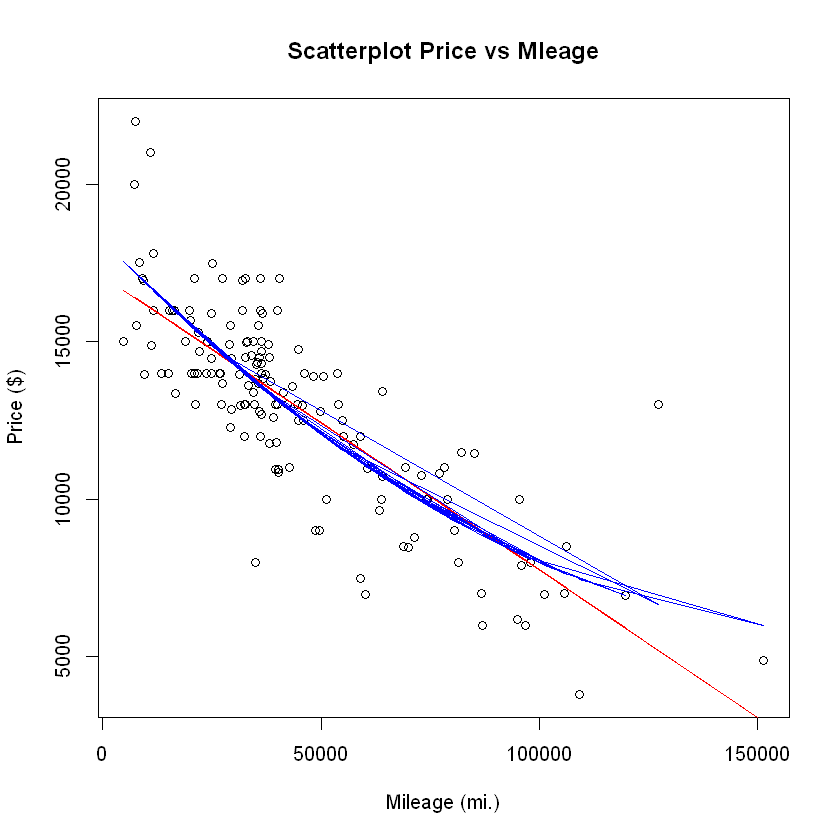

In [9]:
plot (x=usedcars$mileage, y=usedcars$price, main="Scatterplot Price vs Mleage", xlab="Mileage (mi.)", ylab="Price ($)") 
lines (predict(lm1) ~ mileage, col="red")
lines (predict (lm2) ~ mileage, col="blue")

In [11]:
df <- data.frame (x=sort(mileage), y=price[order(mileage)]) #price按mileage排序

In [13]:
lm1 <- lm ( df$y ~ df$x)

In [14]:
lm2 <- lm ( df$y ~ poly (df$x, 2))

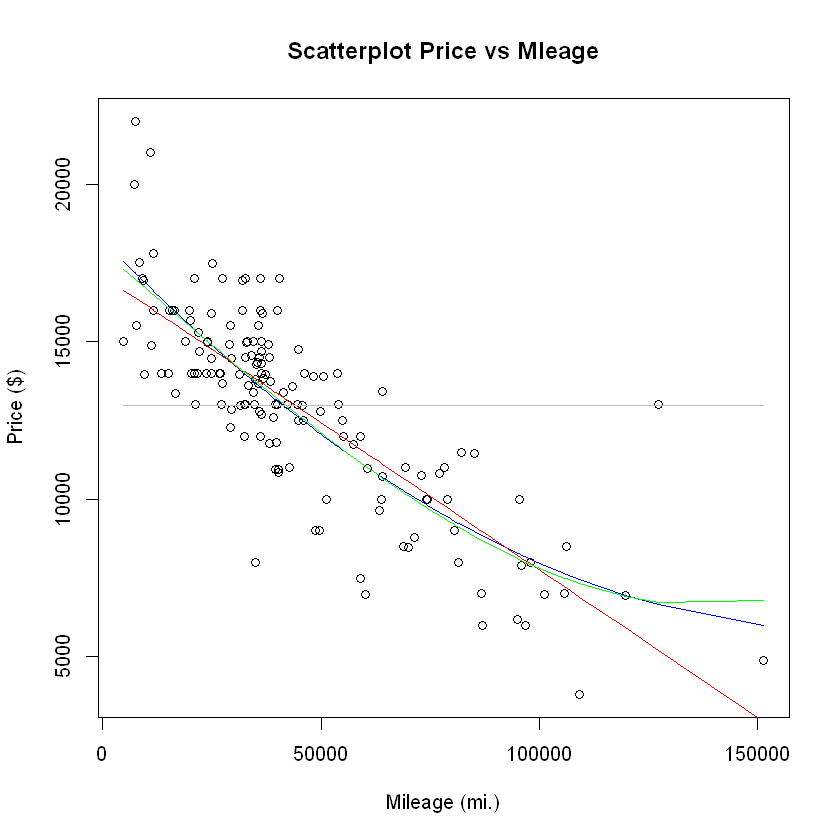

In [15]:
plot (df$y ~ df$x, main="Scatterplot Price vs Mleage", xlab="Mileage (mi.)", ylab="Price ($)")
lines (predict (lm2) ~ df$x, col="blue")
lines (predict (lm1) ~ df$x, col="red")
lm3 <- lm ( df$y ~ poly (df$x, 3))
lines (predict (lm3) ~ df$x, col="green")
lm0 <- lm ( df$y~1)
lines(predict (lm0) ~ df$x, col="gray")

In [16]:
AIC (lm0, lm1, lm2, lm3) #lm2(二次拟合)值最小，所以最合适
anova(lm1)

,df,AIC
lm0,2,2842.593
lm1,3,2687.173
lm2,4,2680.587
lm3,5,2682.048


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
df$x,1,944098077,944098077,274.7083,1.515165e-35
Residuals,148,508635858,3436729,NA,NA


In [17]:
head(usedcars)

year,model,price,mileage,color,transmission
2011,SEL,21992,7413,Yellow,AUTO
2011,SEL,20995,10926,Gray,AUTO
2011,SEL,19995,7351,Silver,AUTO
2011,SEL,17809,11613,Gray,AUTO
2012,SE,17500,8367,White,AUTO
2010,SEL,17495,25125,Silver,AUTO


In [23]:
flm0 <- lm ( price ~ 1)
flm1 <- lm ( price ~ model)
summary (flm1)


Call:
lm(formula = price ~ model)

Residuals:
    Min      1Q  Median      3Q     Max 
-8402.1 -1595.5   787.9  1792.9  5882.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12202.1      320.3  38.095  < 2e-16 ***
modelSEL      3907.1      671.2   5.821 3.53e-08 ***
modelSES       492.0      515.7   0.954    0.342    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2829 on 147 degrees of freedom
Multiple R-squared:  0.1902,	Adjusted R-squared:  0.1792 
F-statistic: 17.27 on 2 and 147 DF,  p-value: 1.837e-07


In [24]:
AIC(flm0,flm1)

,df,AIC
flm0,2,2842.593
flm1,4,2814.940


## Function

In [19]:
meansd <- function (sample) {
 df <- list (center=mean(sample), spread=sd (sample))
 return (df)
 }

In [20]:
sample1 <- rnorm (100, 0, 1)
# sample1

In [21]:
meansd (sample1)

$center
[1] -0.04426735

$spread
[1] 1.005066

In [22]:
vanilla < script.txt 

ERROR: Error in eval(expr, envir, enclos): 找不到对象'vanilla'


In [ ]:
# 求一组数据的标准差
mysd <- function(x) {
    if (!is.vector(x)) {
    warning("argument is not a vector!")
    return (NA)
    }
    s=0.
    s1=0.
    for (i in 1:length(x)) {
    s=s+x[i]
    s1=s1+x[i]*x[i]
    }
    s=s/length(x) #mean 
    s1=s1/length(x) #平方和均值
    s=sqrt(s1-s*s) 
    return(s)
}

In [ ]:
x<- rnorm (1000,0,1)

In [ ]:
mysd(x)